<a href="https://colab.research.google.com/github/AlejandroPinto5/K-fold-Cross-Validation/blob/main/k_fold_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-fold Cross Valdation**

In this notebook, it's implemented k-fold cross validation technique for finding the optimul value k

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Dataset
url = 'https://raw.githubusercontent.com/AlejandroPinto5/KNN-algorithm/main/data_cleaned.csv'
df = pd.read_csv(url)
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [4]:
#NaN values
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
df.describe()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.486592,13.002015,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Separating dependent and independent variables
x = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [19]:
#Scaling data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [27]:
#Splitting dataset
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 96, stratify = y)

In [32]:
#Checking consistency using cross validation and inporting knn
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_score
score = cross_val_score( knn(n_neighbors = 3), X = train_x, y = train_y, cv = 10)
score

array([0.76119403, 0.74626866, 0.76119403, 0.7761194 , 0.65671642,
       0.80597015, 0.8358209 , 0.80597015, 0.81818182, 0.74242424])

In [34]:
#Calculationg mean and standard deviation
score.mean()*100, score.std()*100

(77.09859791949344, 4.856044270804294)

In [35]:
#Automating process of cross validation for different k-neighbors
def val_score(n_neighbors): #n_neighbors as input and mean and standard devation as output
  avg = []
  std = []

  for i in n_neighbors:
    score = cross_val_score( knn(n_neighbors = i), X = train_x, y = train_y, cv = 10)

    avg.append(score.mean())
    std.append(score.std())
  return avg, std

In [42]:
n_neighbors = range(1,50)
mean, std = val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

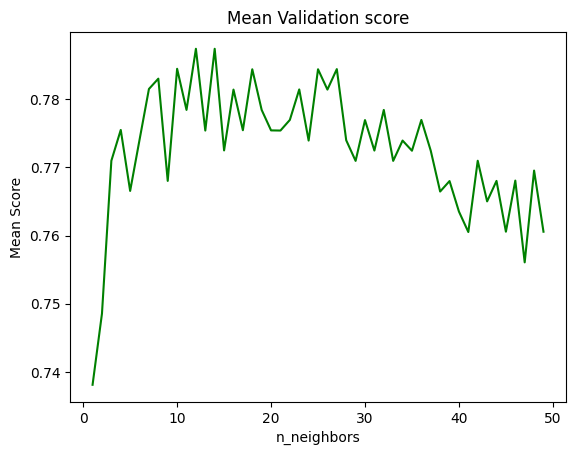

In [43]:
#Plotting mean
plt.plot(n_neighbors, mean, color = 'green', label = 'mean')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

**Conclusion:** the main score corresponding to low values of N-neighbors is fairly low, that means the model is trainedpoorly and hasn't generalized over the validation set. the highest values is 14.

Text(0.5, 1.0, 'Standard Deviation of Validation Score')

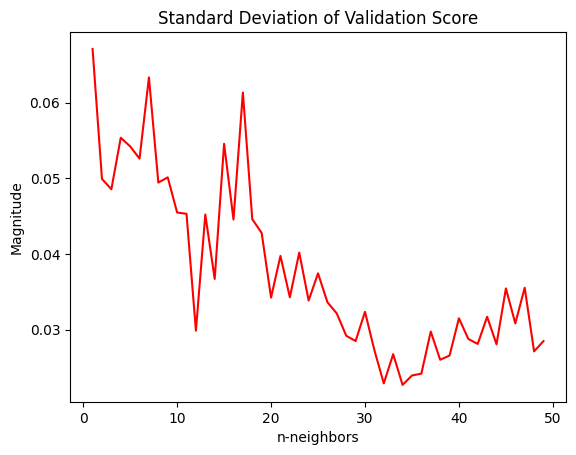

In [44]:
#Plotting standard deviation
plt.plot(n_neighbors,std, color = 'red', label = 'Standard Deviation')
plt.xlabel('n-neighbors')
plt.ylabel('Magnitude')
plt.title('Standard Deviation of Validation Score')

**Conclusion:** The standard deviation over 14 is low, indicating the model generalized pretty well. the optimal value is 14

In [46]:
#Adding the optimal value
clasfr = knn(n_neighbors = 14)
clasfr.fit(train_x, train_y)
score1 = clasfr.score(train_x, train_y)
score = clasfr.score(test_x, test_y)
score, score1

(0.8161434977578476, 0.811377245508982)